In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()


In [2]:
#  Données  olist_customers_dataset
xolist_customers_dataset = pd.read_csv('olist_customers_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_customers_dataset: ', xolist_customers_dataset.shape)
#xolist_customers_dataset.head(10)

forme des données olist_customers_dataset:  (99441, 5)


In [3]:
#  Données  olist_geolocation_dataset
xolist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_geolocation_dataset: ', xolist_geolocation_dataset.shape)
#xolist_geolocation_dataset.head(10)

forme des données olist_geolocation_dataset:  (1000163, 5)


In [4]:
#  Données  olist_order_items_dataset
xolist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_items_dataset: ', xolist_order_items_dataset.shape)
#xolist_order_items_dataset.head(10)

forme des données olist_order_items_dataset:  (112650, 7)


In [5]:
#  Données  olist_order_payments_dataset
xolist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_payments_dataset: ', xolist_order_payments_dataset.shape)
#xolist_order_payments_dataset.head(10)

forme des données olist_order_payments_dataset:  (103886, 5)


In [6]:
#  Données  olist_order_reviews_dataset
xolist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_reviews_dataset: ', xolist_order_reviews_dataset.shape)
#xolist_order_reviews_dataset.head(10)

forme des données olist_order_reviews_dataset:  (100000, 7)


In [7]:
#  Données  olist_orders_dataset
xolist_orders_dataset = pd.read_csv('olist_orders_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_orders_dataset: ', xolist_orders_dataset.shape)
#xolist_orders_dataset.head(10)

forme des données olist_orders_dataset:  (99441, 8)


In [8]:
#  Données d olist_products_dataset
xolist_products_dataset = pd.read_csv('olist_products_dataset.csv', sep = ',', low_memory=False )
#xtrain = convert_types(xtrain, print_info=True)
print('forme des données d olist_products_dataset: ', xolist_products_dataset.shape)
xolist_products_dataset.head(10)

forme des données d olist_products_dataset:  (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [9]:
# Fonctionnalités  des données olist_sellers_dataset
xolist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv', sep = ',', low_memory=False )

print('forme des fonctionnalités  des données olist_sellers_dataset: ', xolist_sellers_dataset.shape)
#xolist_sellers_dataset.head(10)

forme des fonctionnalités  des données olist_sellers_dataset:  (3095, 4)


# *          La présentation générale du jeu de données et nettoyage            *


In [10]:
#Permet d'obtenir la somme des NaN .
xolist_customers_dataset.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
#recherche de doublons
xolist_customers_dataset.duplicated(subset=['customer_unique_id']).sum()

3345

In [12]:
#Permet d'obtenir la somme des NaN .
xolist_products_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [13]:
#Calcul du pourcentage par colonnes des NaN
Pourcentxolist_products_datasetNaN=((xolist_products_dataset.isna().sum()*100)/len(xolist_products_dataset))
Pourcentxolist_products_datasetNaN

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [14]:
#recherche de doublons
xolist_products_dataset.duplicated(subset=['product_id']).sum()

0

Diagramme barre horizontale customer_state

Commentaire.



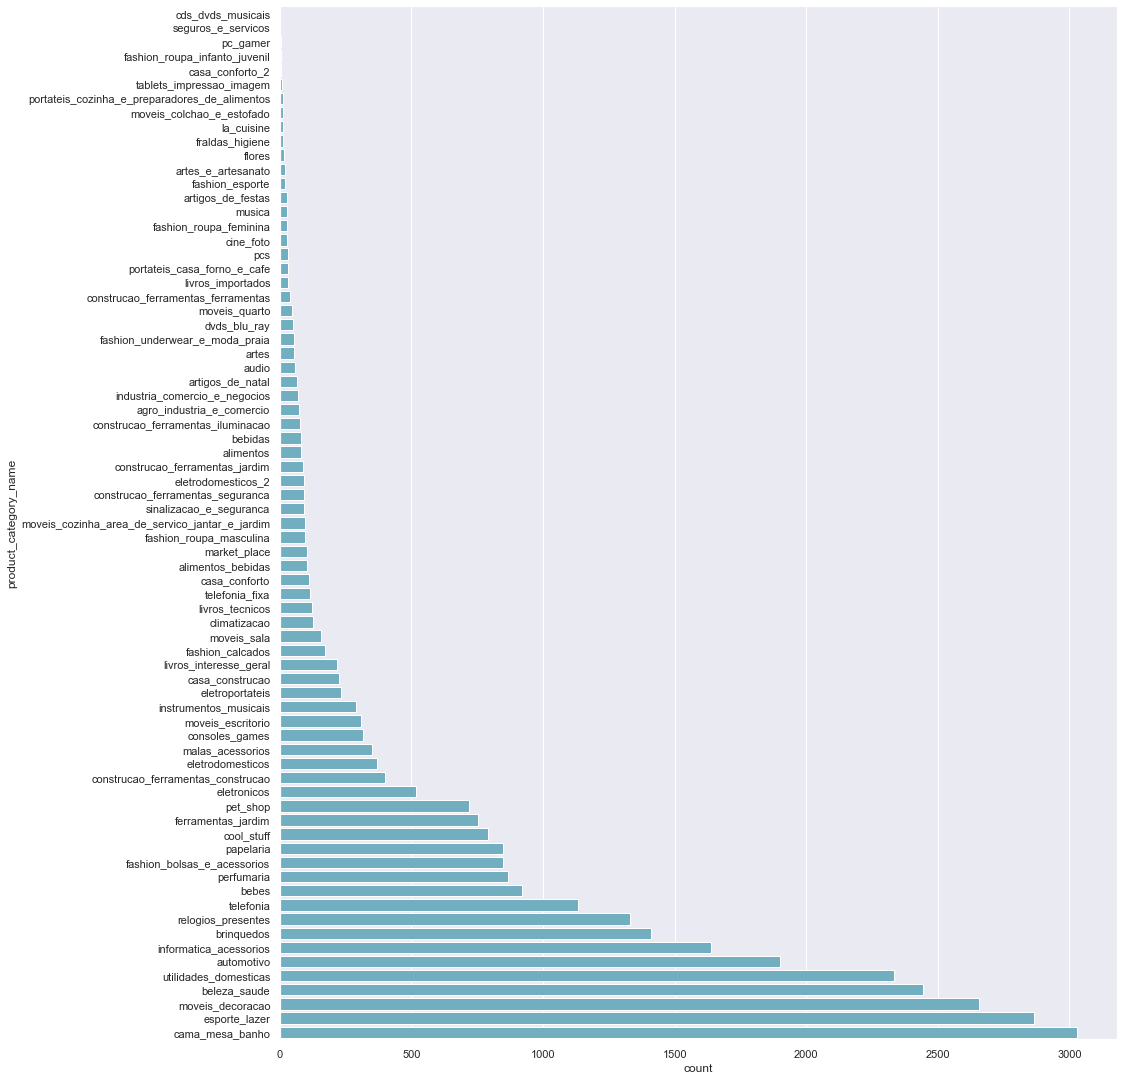

In [15]:
print ('Diagramme barre horizontale customer_state\n')
print('Commentaire.\n')
f, ax = plt.subplots(figsize=(15, 19))
sns.countplot(y="product_category_name", data=xolist_products_dataset, order=xolist_products_dataset['product_category_name'].value_counts().sort_values().index, color="c");

### Analyse bivariée : product_description_lenght en fonction de product_category_name

In [16]:
X = "product_category_name" # qualitative
Y = "product_description_lenght" # quantitative
#sous echantillon product_description_lenght
sous_echantillon1 = xolist_products_dataset[xolist_products_dataset["product_description_lenght"] < 3992.000000].copy()

# On étudie le product_category_name:
sous_echantillon1 = sous_echantillon1[sous_echantillon1["product_category_name"] != "none"] 

In [17]:
# Changement de la palette graphique
sns.set_palette(sns.color_palette("colorblind", 3))

Nous observons que la catégorie marriée est la catégorie qui a les prêts les plus élevés.


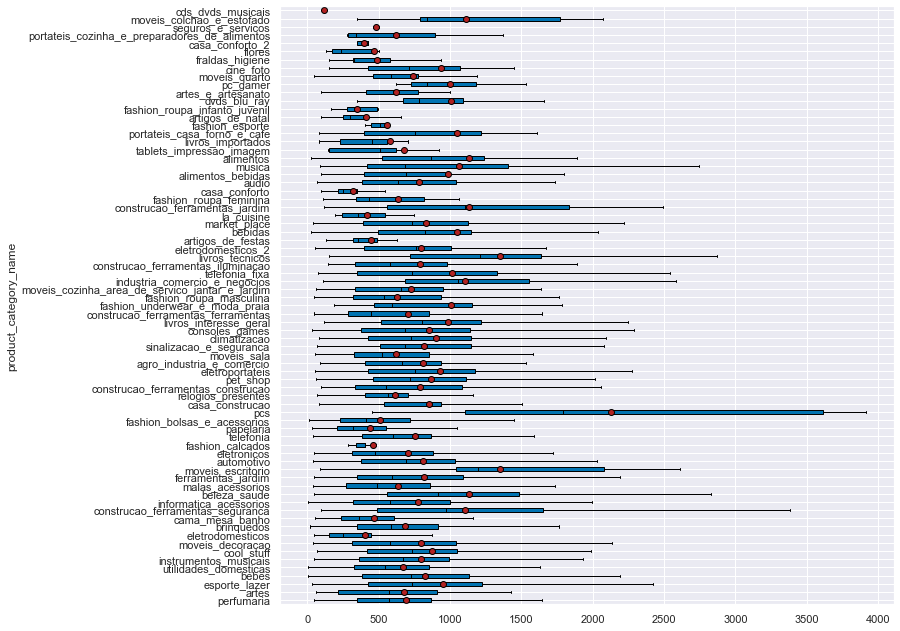

In [18]:
modalites = sous_echantillon1[X].unique()
groupes = []
print('Nous observons que la catégorie marriée est la catégorie qui a les prêts les plus élevés.')

for m in modalites:
    groupes.append(sous_echantillon1[sous_echantillon1[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
fig = plt.figure(figsize=(11, 11))
plt.ylabel("product_category_name")    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

In [19]:
effectifs = xolist_products_dataset["product_category_name"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["product_category_name"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(xolist_products_dataset) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(xolist_products_dataset)*100 # len(data) renvoie la taille de l'échantillon
tab

,product_category_name,n,f,pourcentage
0,cama_mesa_banho,3029,0.091924,9.192437
1,esporte_lazer,2867,0.087008,8.700798
2,moveis_decoracao,2657,0.080635,8.063488
3,beleza_saude,2444,0.074171,7.417074
4,utilidades_domesticas,2335,0.070863,7.086280
...,...,...,...,...
68,casa_conforto_2,5,0.000152,0.015174
69,fashion_roupa_infanto_juvenil,5,0.000152,0.015174
70,pc_gamer,3,0.000091,0.009104
71,seguros_e_servicos,2,0.000061,0.006070


In [20]:
xolist_sellers_dataset = xolist_sellers_dataset.rename(columns = {'seller_zip_code_prefix': 'zip_code_prefix'})
#xolist_sellers_dataset

### Jointure en zip_code_prefix de xolist_sellers_dataset et xolist_sellers_dataset

In [21]:
dataset_Sellers_merge1 = pd.merge(xolist_sellers_dataset, xolist_sellers_dataset, how='inner', on=['zip_code_prefix'])
#dataset_Sellers_merge1

In [22]:
dataset_Sellers_merge1 = dataset_Sellers_merge1.rename(columns = {'seller_id_x': 'seller_id'})
#dataset_Sellers_merge1

In [23]:
# Suppression des colonnes innutiles
for c in dataset_Sellers_merge1.columns:
    if c not in ['seller_id','zip_code_prefix','seller_city_x','seller_state_x']:
        del dataset_Sellers_merge1[c]

### Jointure en seller_id  de dataset_Sellers_merge1 et xolist_order_items_dataset

In [24]:
XSellers = pd.merge(dataset_Sellers_merge1, xolist_order_items_dataset, how='inner', on=['seller_id'])
#XSellers

### Jointure en product_id  de XSellers et xolist_products_dataset

In [25]:
XSellersProducts = pd.merge(XSellers, xolist_products_dataset, how='inner', on=['product_id'])
#XSellersProducts

### Jointure en customer_id de xolist_orders_dataset et xolist_customers_dataset

In [26]:
dataset_Orders_merge2 = pd.merge(xolist_orders_dataset, xolist_customers_dataset, how='inner', on=['customer_id'])
#dataset_Orders_merge2

### Jointure en order_id de dataset_Orders_merge2 et xolist_order_payments_dataset

In [27]:
dataset_Orders_merge3 = pd.merge(dataset_Orders_merge2, xolist_order_payments_dataset, how='inner', on=['order_id'])
#dataset_Orders_merge3

### Jointure en order_id de dataset_Orders_merge3 et xolist_order_reviews_dataset

In [28]:
dataset_Orders_merge4 = pd.merge(dataset_Orders_merge3, xolist_order_reviews_dataset, how='inner', on=['order_id'])
#dataset_Orders_merge4

### Jointure en order_id de XSellersProducts et xolist_order_items_dataset

In [29]:
XOrdersProducts = pd.merge(XSellersProducts, xolist_order_items_dataset, how='inner', on=['order_id'])
#XOrdersProducts

In [30]:
# Suppression des colonnes innutiles
for c in XOrdersProducts.columns:
    if c not in ['seller_id_x','zip_code_prefix','seller_city_x','seller_state_x','order_id',\
                 'order_item_id_x','product_id_x','shipping_limit_date_x','price_x',\
                 'freight_value_x','product_category_name','product_name_lenght','product_photos_qty',\
                 'product_weight_g','roduct_length_cm','product_height_cm','product_width_cm']:        
        del XOrdersProducts[c]

### Jointure en order_id de dataset_Orders_merge4 et XOrdersProducts

In [31]:
dataset_Customer_merge5 = pd.merge(dataset_Orders_merge4, XOrdersProducts, how='inner', on=['order_id'])
#dataset_Customer_merge5

### Jointure en customer_id de dataset_Customer_merge5 et xolist_customers_dataset

In [32]:
XCustomersProducts = pd.merge(dataset_Customer_merge5, xolist_customers_dataset, how='inner', on=['customer_id'])
XCustomersProducts

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id_x,customer_zip_code_prefix_x,...,product_category_name,product_name_lenght,product_photos_qty,product_weight_g,product_height_cm,product_width_cm,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,40.0,4.0,500.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,40.0,4.0,500.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,40.0,4.0,500.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,40.0,4.0,500.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,40.0,4.0,500.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913214,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,59.0,1.0,6550.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
913215,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,59.0,1.0,6550.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
913216,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,59.0,1.0,6550.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
913217,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,...,beleza_saude,45.0,1.0,150.0,7.0,15.0,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR


In [33]:
XCustomersProducts1 = XCustomersProducts.groupby(XCustomersProducts['customer_id']).sum()

In [34]:
XCustomersProducts1

,customer_zip_code_prefix_x,payment_sequential,payment_installments,payment_value,review_score,zip_code_prefix,order_item_id_x,price_x,freight_value_x,product_name_lenght,product_photos_qty,product_weight_g,product_height_cm,product_width_cm,customer_zip_code_prefix_y
customer_id,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,25092,4,32,458.96,4,74000,4,359.20,99.76,220.0,4.0,17068.0,156.0,88.0,25092
000161a058600d5901f007fab4c27140,35550,1,5,67.41,4,30494,1,54.90,12.51,57.0,2.0,150.0,2.0,11.0,35550
0001fd6190edaaf884bcaf3d49edf079,29830,1,10,195.42,5,22240,1,179.99,15.43,45.0,2.0,750.0,23.0,35.0,29830
0002414f95344307404f0ace7a26f1d5,39664,1,1,179.35,5,88115,1,149.90,29.45,38.0,1.0,1600.0,24.0,30.0,39664
000379cdec625522490c315e70c7a9fb,237209,49,49,5243.49,196,732060,49,4557.00,686.49,2793.0,98.0,39200.0,490.0,1666.0,237209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,4917,1,6,91.91,5,19013,1,78.00,13.91,39.0,1.0,1250.0,5.0,22.0,4917
fffecc9f79fd8c764f843e9951b11341,286890,6,3,81.36,9,25650,3,164.70,79.38,144.0,9.0,6150.0,30.0,120.0,286890
fffeda5b6d849fbd39689bb92087f431,44922,2,6,126.26,8,2042,2,95.80,30.46,118.0,8.0,700.0,60.0,40.0,44922


In [35]:
XCustomersProducts.describe()

,customer_zip_code_prefix_x,payment_sequential,payment_installments,payment_value,review_score,zip_code_prefix,order_item_id_x,price_x,freight_value_x,product_name_lenght,product_photos_qty,product_weight_g,product_height_cm,product_width_cm,customer_zip_code_prefix_y
count,913219.000000,913219.000000,913219.000000,913219.000000,913219.000000,913219.000000,913219.000000,913219.000000,913219.000000,907140.000000,907140.000000,913148.000000,913148.000000,913148.000000,913219.000000
mean,32527.348911,1.124742,3.463174,194.729221,3.679819,18586.347641,1.593902,85.340122,18.123648,50.669253,1.641762,1838.267005,13.244845,27.634253,32527.348911
std,29327.428911,0.897896,3.056190,268.153059,1.564998,17344.653454,1.269336,107.294253,12.368341,9.258478,1.384468,3219.203828,10.786913,11.337338,29327.428911
min,1003.000000,1.000000,0.000000,0.000000,1.000000,1001.000000,1.000000,0.850000,0.000000,5.000000,1.000000,0.000000,2.000000,6.000000,1003.000000
25%,9390.000000,1.000000,1.000000,72.990000,3.000000,14940.000000,1.000000,39.000000,12.790000,46.000000,1.000000,467.000000,7.000000,17.000000,9390.000000
50%,22250.000000,1.000000,2.000000,124.500000,4.000000,14940.000000,1.000000,59.990000,15.610000,54.000000,1.000000,900.000000,10.000000,29.000000,22250.000000
75%,45028.000000,1.000000,5.000000,218.800000,5.000000,14940.000000,2.000000,99.000000,19.320000,57.000000,2.000000,1600.000000,15.000000,35.000000,45028.000000
max,99990.000000,29.000000,24.000000,13664.080000,5.000000,99730.000000,21.000000,6735.000000,409.680000,76.000000,20.000000,40425.000000,105.000000,118.000000,99990.000000


In [36]:
XCustomersProducts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913219 entries, 0 to 913218
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       913219 non-null  object 
 1   customer_id                    913219 non-null  object 
 2   order_status                   913219 non-null  object 
 3   order_purchase_timestamp       913219 non-null  object 
 4   order_approved_at              913000 non-null  object 
 5   order_delivered_carrier_date   908314 non-null  object 
 6   order_delivered_customer_date  898256 non-null  object 
 7   order_estimated_delivery_date  913219 non-null  object 
 8   customer_unique_id_x           913219 non-null  object 
 9   customer_zip_code_prefix_x     913219 non-null  int64  
 10  customer_city_x                913219 non-null  object 
 11  customer_state_x               913219 non-null  object 
 12  payment_sequential            

In [37]:
effectifs = XCustomersProducts["order_status"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["order_status"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomersProducts) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomersProducts)*100 # len(data) renvoie la taille de l'échantillon
tab

,order_status,n,f,pourcentage
0,delivered,898257,0.983616,98.361620
1,shipped,9711,0.010634,1.063381
2,canceled,2441,0.002673,0.267296
3,invoiced,1487,0.001628,0.162831
4,processing,1297,0.001420,0.142025
5,unavailable,17,0.000019,0.001862
6,approved,9,0.000010,0.000986


In [38]:
effectifs = XCustomersProducts["review_comment_title"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["review_comment_title"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomersProducts) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomersProducts)*100 # len(data) renvoie la taille de l'échantillon
tab

,review_comment_title,n,f,pourcentage
0,recomendo,3363,0.003683,0.368258
1,Muito bom,3121,0.003418,0.341758
2,Recomendo,2825,0.003093,0.309345
3,super recomendo,2456,0.002689,0.268939
4,Nao recebi tudo,2401,0.002629,0.262916
...,...,...,...,...
4564,Otmo vendor,1,0.000001,0.000110
4565,Entrega e produto bons.,1,0.000001,0.000110
4566,Péssima qualidade do prod,1,0.000001,0.000110
4567,Que demora para chegar,1,0.000001,0.000110


In [39]:
effectifs = XCustomersProducts["review_comment_message"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["review_comment_message"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomersProducts) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomersProducts)*100 # len(data) renvoie la taille de l'échantillon
tab

,review_comment_message,n,f,pourcentage
0,Foi entregue apenas 2 capas das cadeiras sem a...,2401,0.002629,0.262916
1,não chegaram todos os produtos\r\nestá chegand...,2310,0.002530,0.252951
2,Ok,2039,0.002233,0.223276
3,EXCELENTE,2019,0.002211,0.221086
4,Muito bom,1810,0.001982,0.198200
...,...,...,...,...
36429,Achei apenas que o tecido fosse mais confortav...,1,0.000001,0.000110
36430,Não gostei! Já usei esse perfume outras vezes ...,1,0.000001,0.000110
36431,"Ótimo , entregou rápido",1,0.000001,0.000110
36432,O produto foi entregue antes do prazo previsto...,1,0.000001,0.000110


In [40]:
effectifs = XCustomersProducts["payment_type"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["payment_type"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomersProducts) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomersProducts)*100 # len(data) renvoie la taille de l'échantillon
tab

,payment_type,n,f,pourcentage
0,credit_card,678591,0.743076,74.307587
1,boleto,171714,0.188032,18.803157
2,voucher,53275,0.058338,5.833759
3,debit_card,9639,0.010555,1.055497


In [41]:
effectifs = XCustomersProducts["customer_city_y"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["customer_city_y"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomersProducts) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomersProducts)*100 # len(data) renvoie la taille de l'échantillon
tab

,customer_city_y,n,f,pourcentage
0,sao paulo,163834,0.179403,17.940275
1,rio de janeiro,70247,0.076922,7.692240
2,belo horizonte,25178,0.027571,2.757060
3,brasilia,18486,0.020243,2.024268
4,campinas,17867,0.019565,1.956486
...,...,...,...,...
4105,nova brescia,1,0.000001,0.000110
4106,lagoa do mato,1,0.000001,0.000110
4107,sao jose do piaui,1,0.000001,0.000110
4108,porto de pedras,1,0.000001,0.000110


In [42]:
effectifs = XCustomersProducts["customer_city_x"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["customer_city_x"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomersProducts) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomersProducts)*100 # len(data) renvoie la taille de l'échantillon
tab

,customer_city_x,n,f,pourcentage
0,sao paulo,163834,0.179403,17.940275
1,rio de janeiro,70247,0.076922,7.692240
2,belo horizonte,25178,0.027571,2.757060
3,brasilia,18486,0.020243,2.024268
4,campinas,17867,0.019565,1.956486
...,...,...,...,...
4105,nova brescia,1,0.000001,0.000110
4106,lagoa do mato,1,0.000001,0.000110
4107,sao jose do piaui,1,0.000001,0.000110
4108,porto de pedras,1,0.000001,0.000110


In [43]:
#recherche de doublons
XCustomersProducts.duplicated(subset=['order_id','customer_id','customer_unique_id_x']).sum()

814554

In [44]:
#Permet d'obtenir la somme des NaN .
XCustomersProducts.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   219
order_delivered_carrier_date       4905
order_delivered_customer_date     14963
order_estimated_delivery_date         0
customer_unique_id_x                  0
customer_zip_code_prefix_x            0
customer_city_x                       0
customer_state_x                      0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             803566
review_comment_message           466844
review_creation_date                  0
review_answer_timestamp               0
seller_id_x                           0
zip_code_prefix                       0
seller_city_x                         0


In [45]:
#Calcul du pourcentage par colonnes des NaN
PourcentXCustomersProductsNaN=((XCustomersProducts.isna().sum()*100)/len(XCustomersProducts))
PourcentXCustomersProductsNaN

order_id                          0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.023981
order_delivered_carrier_date      0.537111
order_delivered_customer_date     1.638490
order_estimated_delivery_date     0.000000
customer_unique_id_x              0.000000
customer_zip_code_prefix_x        0.000000
customer_city_x                   0.000000
customer_state_x                  0.000000
payment_sequential                0.000000
payment_type                      0.000000
payment_installments              0.000000
payment_value                     0.000000
review_id                         0.000000
review_score                      0.000000
review_comment_title             87.992694
review_comment_message           51.120706
review_creation_date              0.000000
review_answer_timestamp           0.000000
seller_id_x                       0.000000
zip_code_pr

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
import datetime as dt
NOW = dt.datetime(2020,12,29)

In [48]:
NOW

datetime.datetime(2020, 12, 29, 0, 0)

In [49]:
# Make the date_placed column datetime
XCustomersProducts['order_purchase_timestamp'] = pd.to_datetime(XCustomersProducts['order_purchase_timestamp'])

### RFM Récence Fréquence Montant

In [50]:
rfmTable = XCustomersProducts.groupby('customer_id').agg({'order_purchase_timestamp': lambda x: (NOW - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'price_x': lambda x: x.sum()}) # Monetary Value

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'order_purchase_timestamp': 'recency', 
                         'order_id': 'frequency', 
                         'price_x': 'monetary_value'}, inplace=True)

In [51]:
rfmTable.head(100)

,recency,frequency,monetary_value
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,1140,4,359.20
000161a058600d5901f007fab4c27140,1261,1,54.90
0001fd6190edaaf884bcaf3d49edf079,1399,1,179.99
0002414f95344307404f0ace7a26f1d5,1230,1,149.90
000379cdec625522490c315e70c7a9fb,1001,49,4557.00
...,...,...,...
003f7d92ac63c512bb6584219806f8df,1048,49,3572.10
0040a8417928d0d5abd5169cd7877181,915,2,399.98
0040b00970e2139e8c43b647c0da5305,1432,5,154.85


In [52]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [53]:
quantiles

,recency,frequency,monetary_value
0.25,969.0,1.0,79.90
0.50,1074.0,2.0,161.97
0.75,1203.0,4.0,396.00


In [54]:
quantiles = quantiles.to_dict()

In [55]:
quantiles

{'recency': {0.25: 969.0, 0.5: 1074.0, 0.75: 1203.0},
 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'monetary_value': {0.25: 79.9, 0.5: 161.97, 0.75: 396.0}}

In [56]:
rfmSegmentation = rfmTable

In [57]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [58]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [59]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [60]:
rfmSegmentation.head(40)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,1140,4,359.20,3,2,2,322
000161a058600d5901f007fab4c27140,1261,1,54.90,4,4,4,444
0001fd6190edaaf884bcaf3d49edf079,1399,1,179.99,4,4,2,442
0002414f95344307404f0ace7a26f1d5,1230,1,149.90,4,4,3,443
000379cdec625522490c315e70c7a9fb,1001,49,4557.00,2,1,1,211
0004164d20a9e969af783496f3408652,1356,1,59.99,4,4,4,444
000419c5494106c306a97b5635748086,1032,1,34.30,2,4,4,244
00046a560d407e99b969756e0b10f282,1106,2,241.80,3,3,2,332
00050bf6e01e69d5c0fd612f1bcfb69c,1198,1,69.99,3,4,4,344


In [61]:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(30)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
d057951b2e010930970d111b015bc37d,889,297,212640.00,1,1,1,111
ff58662c328f81d3ee549c9caa942f39,916,1764,176382.36,1,1,1,111
768eba0592dcb00cff1bd76eda466c96,886,1372,130340.00,1,1,1,111
92dd835c0a01f474014b0a888b5bef93,893,196,123480.00,1,1,1,111
fad67e7a03b7988057f8a83c285f36de,951,588,99607.20,1,1,1,111
c40329c5ca94144e1c4a130166521b66,965,1764,93844.80,1,1,1,111
dda2128bdf8203aac0d2b4d142956a2a,905,441,87024.00,1,1,1,111
a51ebdfce7cdd6930370083085f240c6,959,441,63063.00,1,1,1,111
6a57b4cb07a55977a176d4a30a882082,933,441,62694.03,1,1,1,111


In [62]:
XCustomersProducts['order_purchase_timestamp'] = pd.to_datetime(XCustomersProducts['order_purchase_timestamp'])
XCustomersProducts['order_approved_at'] = pd.to_datetime(XCustomersProducts['order_approved_at'])
XCustomersProducts['order_delivered_carrier_date'] = pd.to_datetime(XCustomersProducts['order_delivered_carrier_date'])
XCustomersProducts['order_delivered_customer_date'] = pd.to_datetime(XCustomersProducts['order_delivered_customer_date'])
XCustomersProducts['order_estimated_delivery_date'] = pd.to_datetime(XCustomersProducts['order_estimated_delivery_date'])

In [63]:
XCustomersProducts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913219 entries, 0 to 913218
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       913219 non-null  object        
 1   customer_id                    913219 non-null  object        
 2   order_status                   913219 non-null  object        
 3   order_purchase_timestamp       913219 non-null  datetime64[ns]
 4   order_approved_at              913000 non-null  datetime64[ns]
 5   order_delivered_carrier_date   908314 non-null  datetime64[ns]
 6   order_delivered_customer_date  898256 non-null  datetime64[ns]
 7   order_estimated_delivery_date  913219 non-null  datetime64[ns]
 8   customer_unique_id_x           913219 non-null  object        
 9   customer_zip_code_prefix_x     913219 non-null  int64         
 10  customer_city_x                913219 non-null  object        
 11  

In [64]:
from collections import Counter

def most_common_words(labels):
    words = []
    for lab in labels:
        words += lab.split(" ")
    counter = Counter(words)
    for word in counter.most_common(100):
        print(word)



In [65]:
most_common_words(XCustomersProducts['customer_state_x'].values)

('SP', 420366)
('RJ', 128835)
('MG', 105244)
('RS', 51440)
('PR', 38051)
('SC', 31537)
('BA', 25077)
('GO', 19434)
('DF', 18544)
('ES', 17038)
('PE', 10695)
('CE', 8477)
('MT', 6936)
('PA', 4732)
('MS', 4445)
('MA', 4032)
('PB', 3448)
('RN', 3087)
('PI', 2941)
('AL', 2090)
('RO', 1742)
('SE', 1328)
('TO', 1276)
('AP', 835)
('AC', 729)
('AM', 685)
('RR', 175)


In [66]:
most_common_words(XCustomersProducts['order_status'].values)

('delivered', 898257)
('shipped', 9711)
('canceled', 2441)
('invoiced', 1487)
('processing', 1297)
('unavailable', 17)
('approved', 9)


In [67]:
# Suppression des colonnes innutiles
for c in XCustomersProducts.columns:
    if c not in ['customer_id','customer_unique_id_x','order_id','order_status','order_purchase_timestamp',\
                 'order_estimated_delivery_date','customer_state_x','order_item_id_x','order_item_id_x',\
                 'review_score','price_x','freight_value_x','product_category_name']:
        del XCustomersProducts[c]

In [68]:
XCustomersProducts

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,customer_state_x,review_score,order_item_id_x,price_x,freight_value_x,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas
...,...,...,...,...,...,...,...,...,...,...,...,...
913214,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,1,179.99,40.59,informatica_acessorios
913215,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,2,179.99,40.59,informatica_acessorios
913216,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,2,179.99,40.59,informatica_acessorios
913217,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,PR,5,1,68.50,18.36,beleza_saude


In [69]:
XCustomersProducts.to_csv('XCustomersProducts.csv', index = False)

### Création des colonnes régions et types produits pour réduction de dimension

In [70]:
XCustomersProducts['Regions'] = 'none'
XCustomersProducts['types_produits'] = 'none'
XCustomersProducts

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,customer_state_x,review_score,order_item_id_x,price_x,freight_value_x,product_category_name,Regions,types_produits
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas,none,none
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas,none,none
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas,none,none
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas,none,none
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913214,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,1,179.99,40.59,informatica_acessorios,none,none
913215,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,2,179.99,40.59,informatica_acessorios,none,none
913216,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,2,179.99,40.59,informatica_acessorios,none,none
913217,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,PR,5,1,68.50,18.36,beleza_saude,none,none


In [71]:
for index, row in XCustomersProducts.iterrows():  
    # Mise en correspondance des états et des régions du Bresil
    if row['customer_state_x'] == 'AC' or row['customer_state_x'] == 'AM' or row['customer_state_x'] == 'RR' or \
    row['customer_state_x'] == 'RO' or row['customer_state_x'] == 'AP' or row['customer_state_x'] == 'PA' or \
    row['customer_state_x'] == 'TO':
                row['Regions'] = 'NORD'
                XCustomersProducts.at[index,'Regions'] = row['Regions']
                
    # Mise en correspondance des états et des régions du Bresil
    if row['customer_state_x'] == 'MA' or row['customer_state_x'] == 'PI' or row['customer_state_x'] == 'CE' or \
    row['customer_state_x'] == 'RN' or row['customer_state_x'] == 'PB' or row['customer_state_x'] == 'PE' or \
    row['customer_state_x'] == 'AC' or row['customer_state_x'] == 'SE' or row['customer_state_x'] == 'BA':
                row['Regions'] = 'NORD EST'
                XCustomersProducts.at[index,'Regions'] = row['Regions']
                
    # Mise en correspondance des états et des régions du Bresil
    if row['customer_state_x'] == 'MT' or row['customer_state_x'] == 'MS' or row['customer_state_x'] == 'GO' or \
    row['customer_state_x'] == 'DF':
                row['Regions'] = 'CENTRE OUEST'
                XCustomersProducts.at[index,'Regions'] = row['Regions']
                
    # Mise en correspondance des états et des régions du Bresil
    if row['customer_state_x'] == 'MG' or row['customer_state_x'] == 'ES' or row['customer_state_x'] == 'RJ' or \
    row['customer_state_x'] == 'SP':
                row['Regions'] = 'SUD EST'
                XCustomersProducts.at[index,'Regions'] = row['Regions']
                
    # Mise en correspondance des états et des régions du Bresil
    if row['customer_state_x'] == 'PR' or row['customer_state_x'] == 'SC' or row['customer_state_x'] == 'RS':
                row['Regions'] = 'SUD'
                XCustomersProducts.at[index,'Regions'] = row['Regions']               
    # Mise en correspondance des Catégories de produits et des types de produits
    if row['product_category_name'] == 'bebidas' or row['product_category_name'] == 'alimentos' or row['product_category_name'] == 'alimentos_bebidas':
                row['types_produits'] = 'alimentation et boissons'
                XCustomersProducts.at[index,'types_produits'] = row['types_produits']
                
    # Mise en correspondance des Catégories de produits et des types de produits
    if row['product_category_name'] == 'cama_mesa_banho' or row['product_category_name'] == 'moveis_decoracao' or row['product_category_name'] == 'utilidades_domesticas' or \
    row['product_category_name'] == 'moveis_escritorio' or row['product_category_name'] == 'eletrodomesticos' or row['product_category_name'] == 'casa_conforto' or \
    row['product_category_name'] == 'moveis_sala' or row['product_category_name'] == 'moveis_cozinha_area_de_servico_jantar_e_jardim' or\
    row['product_category_name'] == 'eletrodomesticos_2' or row['product_category_name'] == 'moveis_quarto' or row['product_category_name'] == 'portateis_casa_forno_e_cafe' or\
    row['product_category_name'] == 'casa_conforto_2' or row['product_category_name'] == 'moveis_colchao_e_estofado' or\
    row['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos' or row['product_category_name'] == 'la_cuisine':
                row['types_produits'] = 'Maison'
                XCustomersProducts.at[index,'types_produits'] = row['types_produits']
                
    # Mise en correspondance des Catégories de produits et des types de produits
    if row['product_category_name'] == 'esporte_lazer' or row['product_category_name'] == 'instrumentos_musicais' or row['product_category_name'] == 'musica' or \
    row['product_category_name'] == 'dvds_blu_ray' or row['product_category_name'] == 'fashion_esporte' or row['product_category_name'] == 'cds_dvds_musicais':
                row['types_produits'] = 'sports et loisirs'
                XCustomersProducts.at[index,'types_produits'] = row['types_produits']
                
    # Mise en correspondance des Catégories de produits et des types de produits
    if row['product_category_name'] == 'beleza_saude' or row['product_category_name'] == 'bebes' or row['product_category_name'] == 'perfumaria' or \
    row['product_category_name'] == 'artigos_de_natal' or row['product_category_name'] == 'fraldas_higiene':
                row['types_produits'] = 'santé hygiène bébés et beauté'
                XCustomersProducts.at[index,'types_produits'] = row['types_produits']
                
    # Mise en correspondance des Catégories de produits et des types de produits
    if row['product_category_name'] == 'ferramentas_jardim' or row['product_category_name'] == 'construcao_ferramentas_construcao' or row['product_category_name'] == 'casa_construcao' or \
    row['product_category_name'] == 'eletroportateis' or row['product_category_name'] == 'climatizacao' or row['product_category_name'] == 'construcao_ferramentas_iluminacao' or \
    row['product_category_name'] == 'construcao_ferramentas_jardim' or row['product_category_name'] == 'construcao_ferramentas_seguranca' or\
    row['product_category_name'] == 'construcao_ferramentas_ferramentas':
                row['types_produits'] = 'Outillage bricolage construction jardinage'
                XCustomersProducts.at[index,'types_produits'] = row['types_produits']                

                
    # Mise en correspondance des Catégories de produits et des types de produits
    if row['product_category_name'] == 'informatica_acessorios' or row['product_category_name'] == 'telefonia' or row['product_category_name'] == 'eletronicos' or \
    row['product_category_name'] == 'consoles_games' or row['product_category_name'] == 'telefonia_fixa' or row['product_category_name'] == 'audio' or \
    row['product_category_name'] == 'cine_foto' or row['product_category_name'] == 'tablets_impressao_imagem' or row['product_category_name'] == 'pc_gamer':
                row['types_produits'] = 'smartphones et électroniques et informatique'
                XCustomersProducts.at[index,'types_produits'] = row['types_produits'] 
                
    # Mise en correspondance des Catégories de produits et des types de produits
    if row['product_category_name'] == 'fashion_bolsas_e_acessorios' or row['product_category_name'] == 'malas_acessorios' or row['product_category_name'] == 'fashion_roupa_masculina' or \
    row['product_category_name'] == 'fashion_underwear_e_moda_praia' or row['product_category_name'] == 'fashion_calcados' or row['product_category_name'] == 'fashion_roupa_feminina' or \
    row['product_category_name'] == 'fashion_roupa_infanto_juvenil':
                row['types_produits'] = 'Mode et Vêtements'
                XCustomersProducts.at[index,'types_produits'] = row['types_produits']   

    # Mise en correspondance des Catégories de produits et des types de produits
    if row['product_category_name'] == 'relogios_presentes' or row['product_category_name'] == 'none' or row['product_category_name'] == 'papelaria' or \
    row['product_category_name'] == 'market_place' or row['product_category_name'] == 'agro_industria_e_comercio' or row['product_category_name'] == 'industria_comercio_e_negocios' or \
    row['product_category_name'] == 'artes' or row['product_category_name'] == 'pcs' or row['product_category_name'] == 'artes_e_artesanato' or \
    row['product_category_name'] == 'automotivo' or row['product_category_name'] == 'sinalizacao_e_seguranca' or \
    row['product_category_name'] == 'cool_stuff' or row['product_category_name'] == 'artigos_de_festas' or \
    row['product_category_name'] == 'pet_shop' or row['product_category_name'] == 'livros_interesse_geral' or row['product_category_name'] == 'livros_tecnicos' or row['product_category_name'] == 'livros_importados' or \
    row['product_category_name'] == 'brinquedos' or row['product_category_name'] == 'flores' or row['product_category_name'] == 'seguros_e_servicos':
                row['types_produits'] = 'autres catégories'
                XCustomersProducts.at[index,'types_produits'] = row['types_produits']
 
                
    #print(row['product_category_name'], XCustomersProducts['types_produits'])                
                
    #print(row['customer_state_x'], XCustomersProducts['Regions'])
  

In [72]:
XCustomersProducts.to_csv('XCustomersProducts.csv', index = False)

In [73]:
XCustomersProducts

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,customer_state_x,review_score,order_item_id_x,price_x,freight_value_x,product_category_name,Regions,types_produits
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas,SUD EST,Maison
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas,SUD EST,Maison
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas,SUD EST,Maison
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas,SUD EST,Maison
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,8.72,utilidades_domesticas,SUD EST,Maison
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913214,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,1,179.99,40.59,informatica_acessorios,SUD EST,smartphones et électroniques et informatique
913215,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,2,179.99,40.59,informatica_acessorios,SUD EST,smartphones et électroniques et informatique
913216,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,2,179.99,40.59,informatica_acessorios,SUD EST,smartphones et électroniques et informatique
913217,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,PR,5,1,68.50,18.36,beleza_saude,SUD,santé hygiène bébés et beauté


In [74]:
XCustomersProducts = pd.merge(XCustomersProducts, rfmTable, how='inner', on=['customer_id'])
XCustomersProducts

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,customer_state_x,review_score,order_item_id_x,price_x,...,product_category_name,Regions,types_produits,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,...,utilidades_domesticas,SUD EST,Maison,1183,9,269.91,3,1,2,312
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,...,utilidades_domesticas,SUD EST,Maison,1183,9,269.91,3,1,2,312
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,...,utilidades_domesticas,SUD EST,Maison,1183,9,269.91,3,1,2,312
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,...,utilidades_domesticas,SUD EST,Maison,1183,9,269.91,3,1,2,312
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,4,1,29.99,...,utilidades_domesticas,SUD EST,Maison,1183,9,269.91,3,1,2,312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913214,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,1,179.99,...,informatica_acessorios,SUD EST,smartphones et électroniques et informatique,1085,4,719.96,3,2,1,321
913215,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,2,179.99,...,informatica_acessorios,SUD EST,smartphones et électroniques et informatique,1085,4,719.96,3,2,1,321
913216,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,2,179.99,...,informatica_acessorios,SUD EST,smartphones et électroniques et informatique,1085,4,719.96,3,2,1,321
913217,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,PR,5,1,68.50,...,beleza_saude,SUD,santé hygiène bébés et beauté,1026,2,137.00,2,3,3,233


In [75]:
# Suppression des colonnes innutiles
for c in XCustomersProducts.columns:
    if c not in ['customer_id','customer_unique_id_x','order_id','order_status','order_purchase_timestamp',\
                 'order_estimated_delivery_date','Regions','review_score',\
                 'price_x','freight_value_x','types_produits','recency','frequency','monetary_value']:
        del XCustomersProducts[c]

In [76]:
XCustomersProducts

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913214,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,2,179.99,40.59,SUD EST,smartphones et électroniques et informatique,1085,4,719.96
913215,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,2,179.99,40.59,SUD EST,smartphones et électroniques et informatique,1085,4,719.96
913216,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,2,179.99,40.59,SUD EST,smartphones et électroniques et informatique,1085,4,719.96
913217,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,5,68.50,18.36,SUD,santé hygiène bébés et beauté,1026,2,137.00


In [77]:
#recherche de doublons
XCustomersProducts.duplicated(subset=['order_id', 'customer_id',  'Regions', 'types_produits']).sum()

814018

In [78]:
#suppression de doublons en gardant le dernier
XCustomersProducts=XCustomersProducts.drop_duplicates(subset=['order_id', 'customer_id',  'Regions', 'types_produits'], keep='last')
XCustomersProducts

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
8,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
9,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,af07308b275d755c9edb36a90c618231,4,118.70,22.76,NORD EST,santé hygiène bébés et beauté,888,1,118.70
10,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,5,159.90,19.22,CENTRE OUEST,autres catégories,873,1,159.90
11,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,7c142cf63193a1473d2e66489a9ae977,5,45.00,27.20,NORD EST,autres catégories,1136,1,45.00
13,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,5,19.90,8.72,SUD EST,autres catégories,1049,2,39.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913209,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,5,72.00,13.08,SUD EST,santé hygiène bébés et beauté,1390,1,72.00
913210,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02,da62f9e57a76d978d02ab5362c509660,4,174.90,20.10,SUD EST,santé hygiène bébés et beauté,1056,1,174.90
913212,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,5,205.99,65.02,NORD EST,Maison,1219,2,411.98
913216,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,2,179.99,40.59,SUD EST,smartphones et électroniques et informatique,1085,4,719.96


In [79]:
XCustomersProducts.to_csv('P5_01_4_XCustomersProducts.csv', index = False)

In [80]:
#  Données  XCustomerProduct
XCustomer_RFM = pd.read_csv('P5_01_4_XCustomersProducts.csv', sep = ',', low_memory=False )
print('forme des données XCustomer: ', XCustomer_RFM.shape)
XCustomer_RFM.head(10)

forme des données XCustomer:  (99201, 14)


,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,4,118.70,22.76,NORD EST,santé hygiène bébés et beauté,888,1,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,5,159.90,19.22,CENTRE OUEST,autres catégories,873,1,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,5,45.00,27.20,NORD EST,autres catégories,1136,1,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,5,19.90,8.72,SUD EST,autres catégories,1049,2,39.80
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-08-01 00:00:00,80bb27c7c16e8f973207a5086ab329e2,4,147.90,27.36,SUD,autres catégories,1268,1,147.90
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,2,49.90,16.05,SUD,none,1357,1,49.90
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-06-07 00:00:00,932afa1e708222e5821dac9cd5db4cae,5,59.99,15.17,SUD EST,autres catégories,1322,5,299.95
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-03-06 00:00:00,39382392765b6dc74812866ee5ee92a7,1,19.90,16.05,SUD,Maison,1435,3,59.70
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,5,149.99,19.77,SUD EST,Maison,1248,6,899.94


In [81]:
# Suppression des colonnes innutiles
for c in XCustomer_RFM.columns:
    if c not in ['recency','frequency','monetary_value']:
        del XCustomer_RFM[c]

In [82]:
XCustomer_RFM

,recency,frequency,monetary_value
0,1183,9,269.91
1,888,1,118.70
2,873,1,159.90
3,1136,1,45.00
4,1049,2,39.80
...,...,...,...
99196,1390,1,72.00
99197,1056,1,174.90
99198,1219,2,411.98
99199,1085,4,719.96


In [83]:
XCustomer_RFM.to_csv('P5_01_4_XCustomer_RFM.csv', index = False)